In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

0


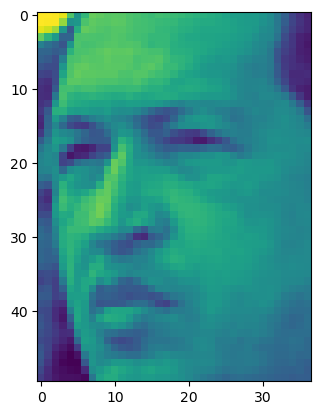

In [3]:
from random import randint
index = randint(0,len(df))
example = df.images[0]

plt.imshow(df.images[index])
print(index)

In [4]:
X = df.images
y = df.target

In [5]:
y.max(), y.min()

(6, 0)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [8]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(50,37,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(7, activation='softmax'))

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [12]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.3553 - loss: 1.7917 - val_accuracy: 0.4612 - val_loss: 1.6773
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.3848 - loss: 1.7379 - val_accuracy: 0.4612 - val_loss: 1.6577
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.4006 - loss: 1.6922 - val_accuracy: 0.4612 - val_loss: 1.6600
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.4160 - loss: 1.6860 - val_accuracy: 0.4612 - val_loss: 1.6120
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.3881 - loss: 1.6507 - val_accuracy: 0.4961 - val_loss: 1.4706
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.4618 - loss: 1.5104 - val_accuracy: 0.5465 - val_loss: 1.3755
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.5275 - loss: 1.3298 - val_accuracy: 0.5814 - val_loss: 1.3637
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.5587 - loss: 1.2077 - val_accuracy: 0.6744 - v

In [13]:
model.save('model.keras')

In [14]:
history = model.history.history

In [16]:
import pandas as pd

In [20]:
acc_history = (history['accuracy'])

In [21]:
val_acc_history = (history['val_accuracy'])

In [24]:
len(val_acc_history), len(acc_history)

(36, 36)

In [28]:
acc_df = pd.DataFrame({'accuracy': acc_history, 'val_accuracy': val_acc_history})
acc_df.head()

,accuracy,val_accuracy
0,0.383495,0.461240
1,0.398058,0.461240
2,0.395146,0.461240
3,0.399029,0.461240
4,0.414563,0.496124


<Axes: >

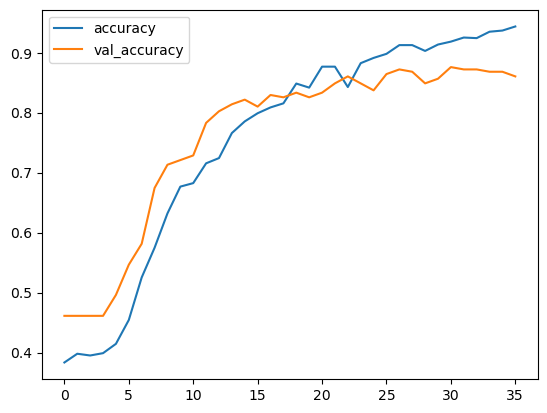

In [27]:
acc_df.plot()

In [33]:
acc_df['val']

AttributeError: 'list' object has no attribute 'describe'